In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import ffn
import bt
%matplotlib inline

# Create fake data

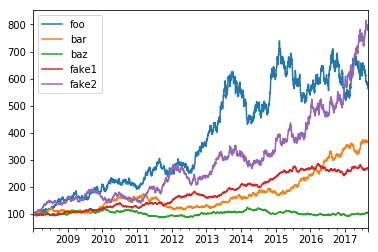

In [2]:
rf = 0.04
np.random.seed(1)
mus = np.random.normal(loc=0.05,scale=0.02,size=5) + rf
sigmas = (mus - rf)/0.3 + np.random.normal(loc=0.,scale=0.01,size=5)

num_years = 10
num_months_per_year = 12
num_days_per_month = 21
num_days_per_year = num_months_per_year*num_days_per_month

rdf = pd.DataFrame(
    index = pd.date_range(
        start="2008-01-02",
        periods=num_years*num_months_per_year*num_days_per_month,
        freq="B"
    ),
    columns=['foo','bar','baz','fake1','fake2']
)

for i,mu in enumerate(mus):
    sigma = sigmas[i]
    rdf.iloc[:,i] = np.random.normal(
        loc=mu/num_days_per_year,
        scale=sigma/np.sqrt(num_days_per_year),
        size=rdf.shape[0]
    )
pdf = np.cumprod(1+rdf)*100
pdf.iloc[0,:] = 100

pdf.plot()

In [3]:
strategy_names = np.array(
    [
        'Equal Weight',
        'Inv Vol'
    ]
)

runMonthlyAlgo = bt.algos.RunMonthly(
    run_on_first_date=True,
    run_on_end_of_period=True
)
selectAllAlgo = bt.algos.SelectAll()
rebalanceAlgo = bt.algos.Rebalance()

strats = []
tests = []

for i,s in enumerate(strategy_names):
    if s == "Equal Weight":
        wAlgo = bt.algos.WeighEqually()
    elif s == "Inv Vol":
        wAlgo = bt.algos.WeighInvVol()
    
    strat = bt.Strategy(
        s,
        [
            runMonthlyAlgo,
            selectAllAlgo,
            wAlgo,
            rebalanceAlgo
        ]
    )
    strats.append(strat)
        
    t = bt.Backtest(
        strat,
        pdf,
        integer_positions = False,
        progress_bar=False
    )
    tests.append(t)

In [4]:
combined_strategy = bt.Strategy(
    'Combined',
    algos = [
        runMonthlyAlgo,
        selectAllAlgo,
        bt.algos.WeighEqually(),
        rebalanceAlgo
    ],
    children = [x.strategy for x in tests]
)

combined_test = bt.Backtest(
    combined_strategy,
    pdf,
    integer_positions = False,
    progress_bar = False
)

res = bt.run(combined_test)

C:\Anaconda3\envs\invest_basic\lib\site-packages\ffn\core.py:2056: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


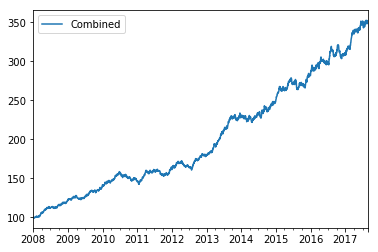

In [5]:
res.prices.plot()

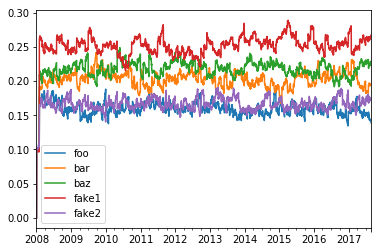

In [6]:
res.get_security_weights().plot()

In [7]:
strategy_names = np.array(
    [
        'Equal Weight',
        'Inv Vol'
    ]
)

runMonthlyAlgo = bt.algos.RunMonthly(
    run_on_first_date=True,
    run_on_end_of_period=True
)
selectAllAlgo = bt.algos.SelectAll()
rebalanceAlgo = bt.algos.Rebalance()

strats = []
tests = []
results = []

for i,s in enumerate(strategy_names):
    if s == "Equal Weight":
        wAlgo = bt.algos.WeighEqually()
    elif s == "Inv Vol":
        wAlgo = bt.algos.WeighInvVol()
    
    strat = bt.Strategy(
        s,
        [
            runMonthlyAlgo,
            selectAllAlgo,
            wAlgo,
            rebalanceAlgo
        ]
    )
    strats.append(strat)
        
    t = bt.Backtest(
        strat,
        pdf,
        integer_positions = False,
        progress_bar=False
    )
    tests.append(t)
    
    res = bt.run(t)
    results.append(res)

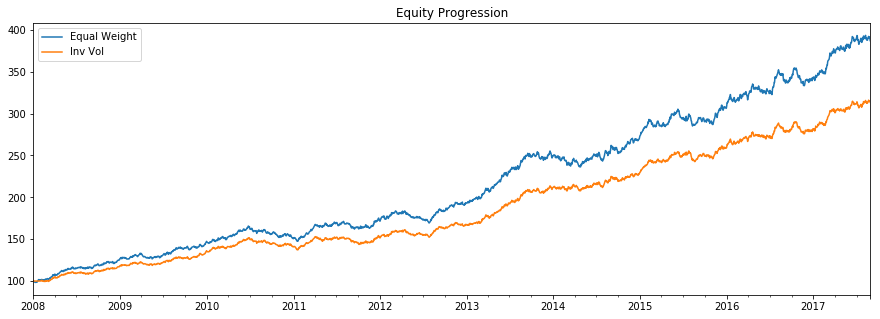

In [8]:
fig, ax = plt.subplots(nrows=1,ncols=1)
for i,r in enumerate(results):
    r.plot(ax=ax)

In [9]:
merged_prices_df = bt.merge(results[0].prices,results[1].prices)

combined_strategy = bt.Strategy(
    'Combined',
    algos = [
        runMonthlyAlgo,
        selectAllAlgo,
        bt.algos.WeighEqually(),
        rebalanceAlgo
    ]
)

combined_test = bt.Backtest(
    combined_strategy,
    merged_prices_df,
    integer_positions = False,
    progress_bar = False
)

res = bt.run(combined_test)

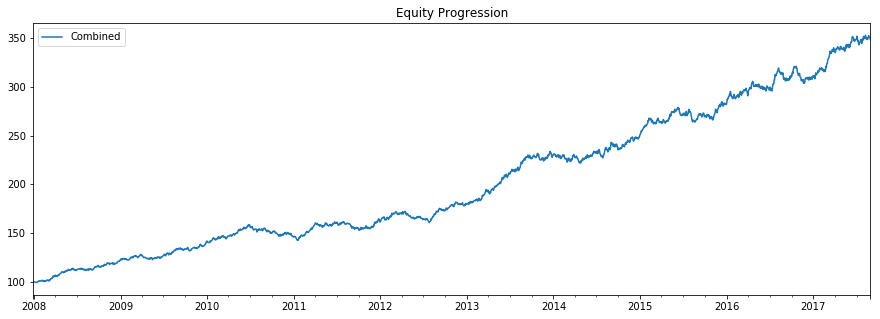

In [10]:
res.plot()

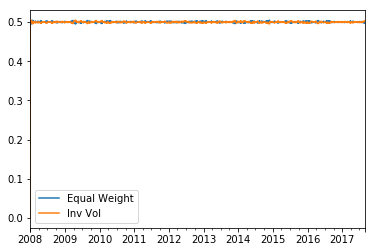

In [11]:
res.get_security_weights().plot()